In [1]:
#@title Librerías
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Truco para obtener números aleatorios entre -1 y 1

2*np.random.random(5)-1

array([-0.90929068,  0.80798141, -0.79465904,  0.01728915,  0.87004902])

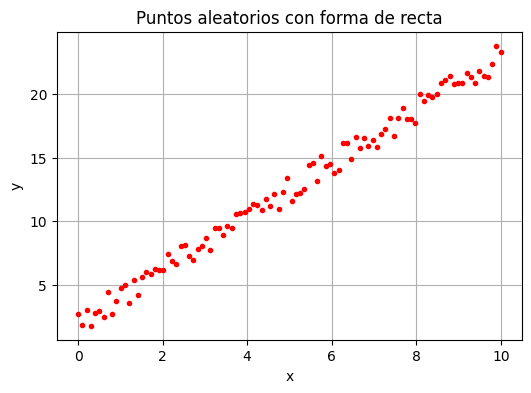

In [13]:
#@title **Puntos aleatorios que se asemejan a una recta**

N = 100                               #Número de puntos
rng = 0.5*(2*np.random.random(N)-1)   #Serapación de los puntos alrededor de la recta
x = np.linspace(0,10,100)             #Dominio en x
b = 2                                 #Intersecto de la recta
y = 2.1*(x+rng) + b                   #Función y, con los x modificados con los números aleatorios

#Graficación
plt.figure(figsize=(6,4))
plt.title('Puntos aleatorios con forma de recta')
plt.plot(x,y,'r.')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [5]:
from scipy.optimize import curve_fit #Método para hacer un fit

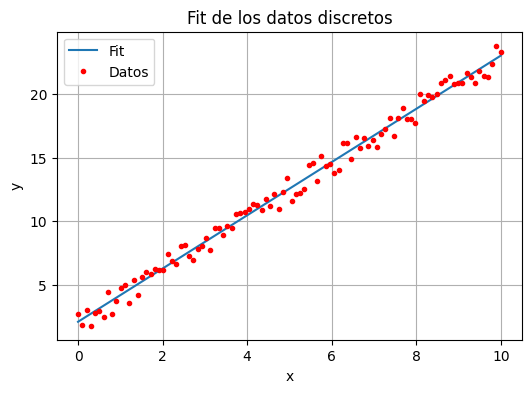

In [29]:
#@title **Fit de los puntos usando curve_fit de scipy**

#Definimos la función
def f(x,a,b): return a*x + b

x = np.linspace(0,10,100)
y = 2.1*(x+rng) + b

#Método del fit
fit = curve_fit(f, x, y)

#Graficación
plt.figure(figsize=(6,4))
plt.title('Fit de los datos discretos')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,f(x,fit[0][0], fit[0][1]),label='Fit')
plt.plot(x,y,'r.',label='Datos')
plt.legend()
plt.grid()

In [22]:
#@title **Datos discretos de un péndulo amortiguado**

file = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRdgSKhgrKh0PWJkCHIKcNFi1dsJptWsI_yzTI81YvvSqO-yUmRDpMMuHBXKEAOzq4Af7F4rXyDLWjW/pub?output=csv'
df = pd.read_csv(file, sep=';', decimal='.')                                   #Cambiar ; por .
df = df.rename(columns={'Tiempo (ms)':'Tiempo_ms', 'Ángulo 1,':'AnguloDeg'})   #Cambiar nombre a las columnas
df.AnguloDeg = df.AnguloDeg.str.replace(',','.').astype(float)                 #Cambiar , por . y volverlo de sting a float
df['AnguloRad'] = np.deg2rad(df.AnguloDeg)                                     #Agregar columna con ángulos en radianes usando numpy
df

,Tiempo_ms,AnguloDeg,AnguloRad
0,9,59.289612,1.034799
1,42,59.982327,1.046889
2,75,61.237453,1.068795
3,108,63.492477,1.108153
4,142,65.388771,1.141249
...,...,...,...
2842,94709,94.937576,1.656973
2843,94743,96.479851,1.683891
2844,94776,97.940689,1.709387
2845,94809,99.318092,1.733428


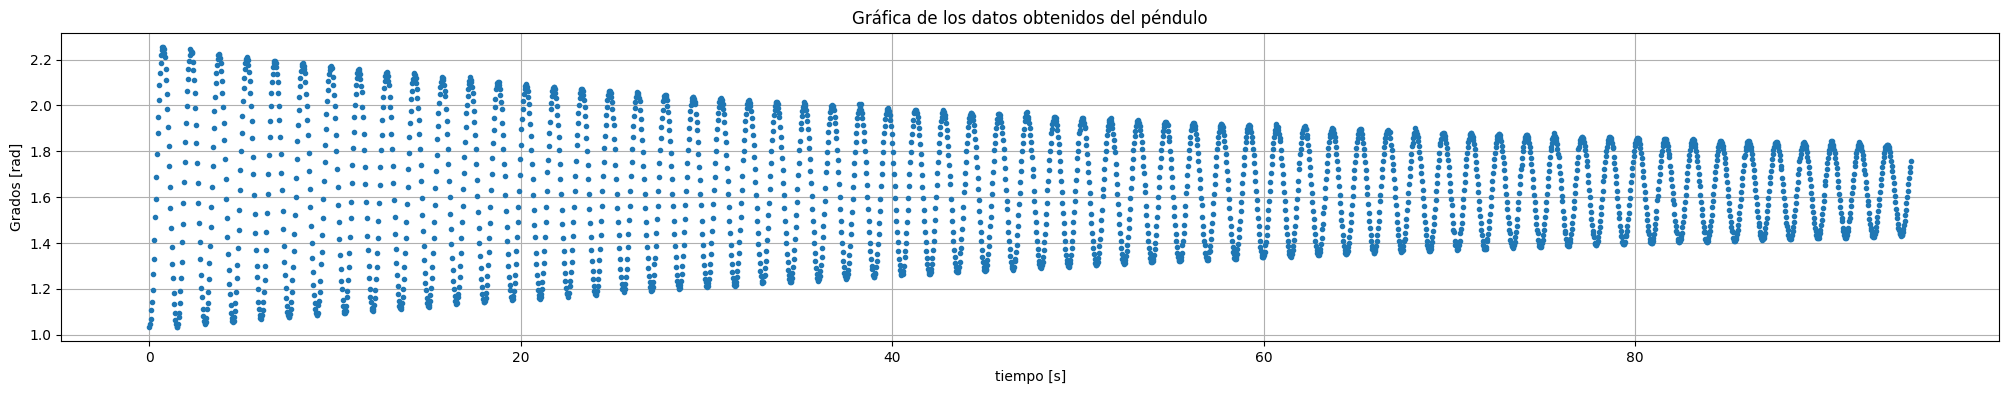

In [32]:
#@title **Graficación de los datos**
plt.figure(figsize=(25,4))
plt.title('Gráfica de los datos obtenidos del péndulo')
plt.xlabel('tiempo [s]')
plt.ylabel('Grados [rad]')
plt.plot(df.Tiempo_ms/1000, df.AnguloRad, '.')  #Hacemos Tiempo_ms/1000 para pasarlos de milisegundos a segundos
plt.grid()

<ipython-input-31-6be8f4244b53>:3: RuntimeWarning: overflow encountered in exp
  def f(t,A,omega, phi, b,C): return A*np.cos(omega*t + phi)*np.exp(-b*t) + C


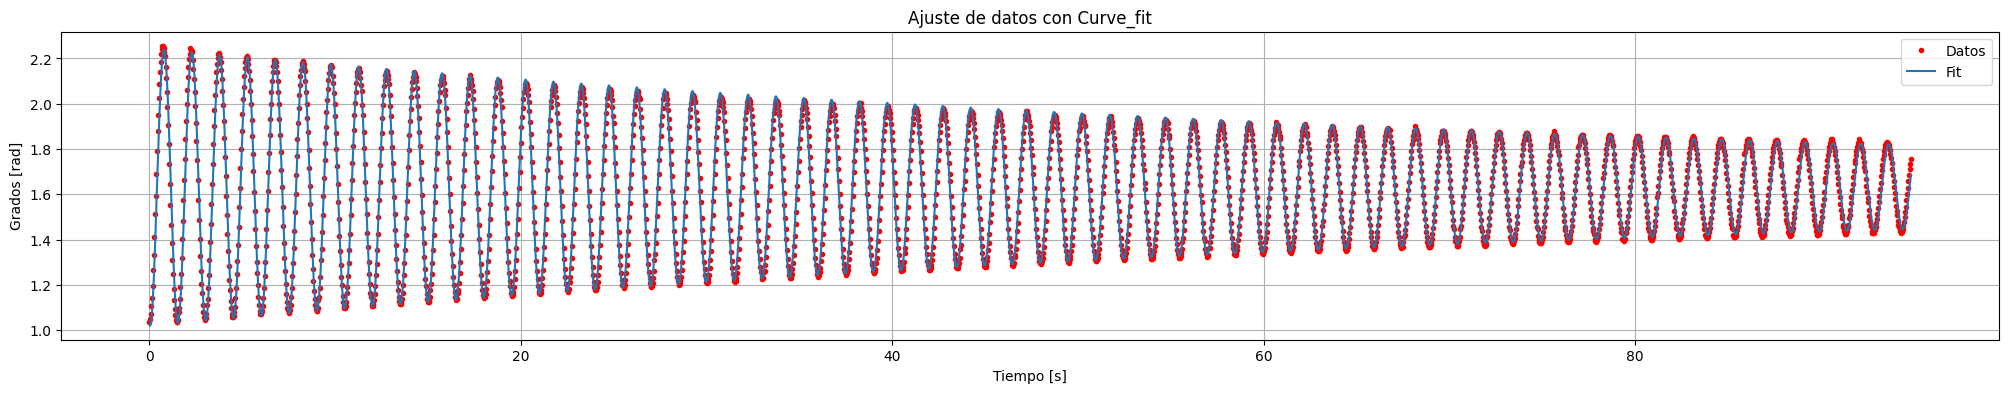

In [31]:
#@title **Fit de los puntos usando curve_fit de scipy**

#Definimos la función que se ajustaría a los datos con sus constantes de a determinar
def f(t,A,omega, phi, b,C): return A*np.cos(omega*t + phi)*np.exp(-b*t) + C


x_ = np.linspace(min(df.Tiempo_ms/1000),max(df.Tiempo_ms/1000), 10000 )

t = np.array(df.Tiempo_ms/1000)
y = np.array(df.AnguloRad)

#Grafiación
fit = curve_fit(f, t, y)
plt.figure(figsize=(25,4))
plt.title('Ajuste de datos con Curve_fit')
plt.plot(t,y,'.',color='red',label='Datos')
plt.plot(x_,f(x_,fit[0][0],fit[0][1], fit[0][2], fit[0][3], fit[0][4]), label='Fit')
plt.xlabel('Tiempo [s]')
plt.ylabel('Grados [rad]')
plt.legend()
plt.grid();